Name: Prachiti Akre

Roll no.:11

Subject: ML LAB

AIM: Implement K means clustering algorithm

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

In [ ]:
Individual=[1,2,3,4,5,6,7]
Variable1=[1.0,1.5,3.0,5.0,3.5,4.5,3.5]
Variable2=[1.0,2.0,4.0,7.0,5.0,5.0,4.5]

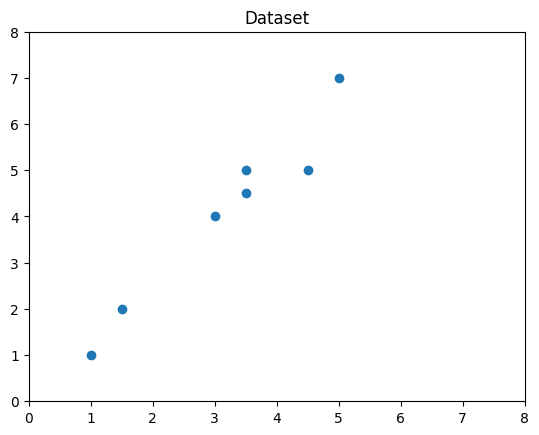

In [ ]:
data = pd.DataFrame({'x':Variable1, 'y':Variable2})

plt.plot()
plt.xlim([0,8])
plt.ylim([0,8])
plt.title('Dataset')
plt.scatter(Variable1,Variable2)
plt.show()

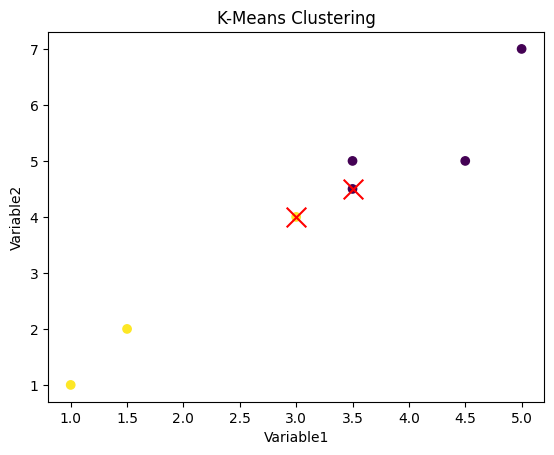

Iteration 1 - Centroids: [[4.125      5.375     ]
 [1.83333333 2.33333333]]


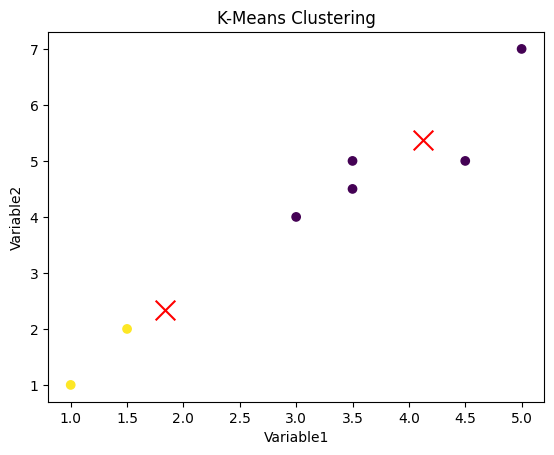

Iteration 2 - Centroids: [[3.9  5.1 ]
 [1.25 1.5 ]]


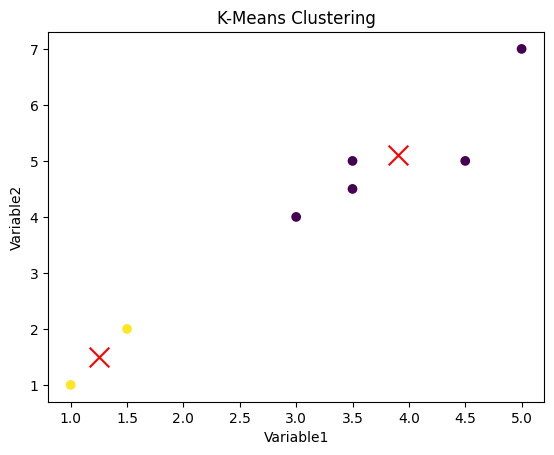

Final cluster assignments: [1 1 0 0 0 0 0]


In [ ]:
data = np.array(list(zip(Variable1, Variable2)))

k = 2

np.random.seed(0)
initial_centers = data[np.random.choice(data.shape[0], k, replace=False)]

cluster_assignments = np.zeros(data.shape[0])
centroids = initial_centers

def update_cluster_assignments(data, centroids):
    distances = np.array([euclidean_distance(data, np.array([centroid])) for centroid in centroids])
    return np.argmin(distances, axis=0)

def update_centroids(data, cluster_assignments, k):
    new_centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        mask = cluster_assignments == i
        if np.any(mask):
            new_centroids[i] = np.mean(data[mask], axis=0)
    return new_centroids

def plot_data(data, cluster_assignments, centroids):
    plt.figure()
    plt.scatter(data[:, 0], data[:, 1], c=cluster_assignments)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)
    plt.xlabel('Variable1')
    plt.ylabel('Variable2')
    plt.title('K-Means Clustering')
    plt.show()

previous_cluster_assignments = None
iteration = 0
while True:
    cluster_assignments = update_cluster_assignments(data, centroids)
    plot_data(data, cluster_assignments, centroids)
    if np.array_equal(cluster_assignments, previous_cluster_assignments):
        break
    previous_cluster_assignments = cluster_assignments
    centroids = update_centroids(data, cluster_assignments, k)
    print(f"Iteration {iteration + 1} - Centroids: {centroids}")
    iteration += 1

print("Final cluster assignments:", cluster_assignments)
